### Import the necessary libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the dataset

In [97]:
myntra  = pd.read_excel(r"WOMEN.xlsx")


In [98]:
myntra.head(5)
# We see that there are two different discount representation

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
0,Women Wide Leg High-Rise Jeans,Rs.1031,SASSAFRAS,57% OFF,4.1,6.8k
1,Women Cargo Style Jeans,Rs.629,V-Mart,10% OFF,2.6,5
2,Women Cotton Cargos Trousers,Rs.1399,IVOC,Rs. 1800 OFF,4.3,1.3k
3,Women Boyfriend Fit Jeans,NaN,Styli,NaN,NaN,NaN
4,Women Wide Leg Catherin Jeans,Rs.1436,MANGO,60% OFF,4.2,284


### Dropping the null values

In [99]:
myntra.shape

(210245, 6)

In [100]:
myntra.isnull().sum()

Product Name           2
Product Price      14720
Product Brand          0
Discount           14720
Product Rating     86524
Verified Buyers    86524
dtype: int64

In [101]:
myntra.dropna(inplace=True)

In [102]:
myntra.isnull().sum()

Product Name       0
Product Price      0
Product Brand      0
Discount           0
Product Rating     0
Verified Buyers    0
dtype: int64

In [103]:
myntra.shape

(117054, 6)

### Processing and cleaning the data

Here we will divide the dataset into two dataframes  i) absolute_discount, which will contain the absolute discount values. and ii) myntra1 which will contain the percentage discount values.
We will  transform the absolute value of discount to it's percentage form, and concatenate the two dataframes to create the final dataset.

In [104]:
#Filter the myntra  dataset such that it  does not contain the absolute discount value
myntra1 = myntra[~myntra['Discount'].str.contains('Rs')]

In [105]:
myntra1.head(4) #myntra1 contains only the  discount in percentage

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
0,Women Wide Leg High-Rise Jeans,Rs.1031,SASSAFRAS,57% OFF,4.1,6.8k
1,Women Cargo Style Jeans,Rs.629,V-Mart,10% OFF,2.6,5
4,Women Wide Leg Catherin Jeans,Rs.1436,MANGO,60% OFF,4.2,284
5,Women High-Rise Jeans,Rs.1099,SASSAFRAS BASICS,50% OFF,4.0,1.3k


In [106]:
myntra1.shape

(104849, 6)

In [107]:
# Create a new dataframe which will contain the absolute discount value.
absolute_discount= myntra[myntra['Discount'].str.contains('Rs')]
absolute_discount

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
2,Women Cotton Cargos Trousers,Rs.1399,IVOC,Rs. 1800 OFF,4.3,1.3k
13,Women Straight Fit Jeans,Rs.599,Kotty,Rs. 1400 OFF,3.9,594
69,Straight Fit High-Rise Jeans,Rs.999,ADBUCKS,Rs. 500 OFF,4.1,1.9k
101,Straight Fit High-Rise Jeans,Rs.999,ADBUCKS,Rs. 500 OFF,4.1,1.9k
165,Women Straight Fit Jeans,Rs.599,Kotty,Rs. 1400 OFF,3.9,594
...,...,...,...,...,...,...
210109,Empire Cotton Kurta Set,Rs.1499,KALINI,Rs. 5500 OFF,4.3,2.9k
210147,Kurta with Patiala & Dupatta,Rs.1499,KALINI,Rs. 5500 OFF,4.3,2.9k
210159,Empire Cotton Kurta Set,Rs.1499,KALINI,Rs. 5500 OFF,4.3,2.9k
210197,Kurta with Patiala & Dupatta,Rs.1499,KALINI,Rs. 5500 OFF,4.3,2.9k


In [108]:
# Remove 'Rs.' from the 'Product Price' column
absolute_discount.loc[:, 'Product Price'] = absolute_discount['Product Price'].str.replace('Rs.', '')

# Remove 'Rs.' from the 'Discount' column
absolute_discount.loc[:, 'Discount'] = absolute_discount['Discount'].str.replace('Rs.', '')

# Remove 'OFF' from the 'Discount' column
absolute_discount.loc[:, 'Discount'] = absolute_discount['Discount'].str.replace('OFF', '')


In [109]:
absolute_discount[['Discount','Product Price']]

,Discount,Product Price
2,1800,1399
13,1400,599
69,500,999
101,500,999
165,1400,599
...,...,...
210109,5500,1499
210147,5500,1499
210159,5500,1499
210197,5500,1499


#### Calculating the actual price of the product in absolute_discount dataframe

In [110]:
val1= [int(i) for i in absolute_discount['Product Price'].values]
val2 = [int(i) for i in absolute_discount['Discount'].values]
val3= []
for i in range(len(val1)):
    val3.append(val1[i] + val2[i]) 
print(val3) #val3 contains the actual price of each product

[3199, 1999, 1499, 1499, 1999, 2599, 2399, 2499, 2999, 2999, 2599, 3429, 3999, 1999, 3199, 1999, 2999, 2399, 2999, 1999, 2499, 2349, 2499, 3199, 2399, 2499, 2499, 1499, 2499, 2499, 2499, 2499, 1999, 3199, 1999, 1999, 2499, 2499, 3299, 2499, 2499, 2399, 2599, 2999, 1999, 2499, 2499, 1899, 1999, 2599, 3299, 2499, 1799, 2299, 2499, 3399, 2999, 1999, 2999, 3299, 1999, 1999, 1899, 2399, 2349, 2499, 1999, 2399, 3799, 2499, 2799, 1499, 3299, 2399, 2399, 2799, 2399, 2499, 2999, 1999, 2349, 3799, 2599, 2399, 3299, 1999, 1999, 2199, 1999, 2999, 2499, 3199, 2399, 2499, 2399, 2399, 2299, 1999, 3699, 1999, 2299, 2399, 2499, 2399, 2499, 2499, 1999, 2499, 2399, 2399, 2499, 3999, 2399, 2099, 3199, 2099, 2499, 3699, 2499, 2999, 2499, 3299, 2299, 2499, 3299, 2999, 3999, 1949, 2499, 3429, 1999, 2999, 2999, 2999, 3699, 2299, 2499, 3599, 4199, 1999, 2399, 2299, 2999, 2599, 2999, 2499, 2999, 2999, 2399, 3249, 3199, 1999, 1499, 2999, 2399, 2999, 2999, 3799, 3299, 2499, 3299, 2999, 1999, 2499, 3999, 3429, 319

In [111]:
len(val3)

12205

In [112]:
absolute_discount.loc[:,'Actual Price']= val3 #store the actual price of product inside the Actual Price column

C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\2178658661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.loc[:,'Actual Price']= val3 #store the actual price of product inside the Actual Price column


In [113]:
absolute_discount.head(5)

#'Actual Price' Column contains the actual price of the product

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Actual Price
2,Women Cotton Cargos Trousers,1399,IVOC,1800,4.3,1.3k,3199
13,Women Straight Fit Jeans,599,Kotty,1400,3.9,594,1999
69,Straight Fit High-Rise Jeans,999,ADBUCKS,500,4.1,1.9k,1499
101,Straight Fit High-Rise Jeans,999,ADBUCKS,500,4.1,1.9k,1499
165,Women Straight Fit Jeans,599,Kotty,1400,3.9,594,1999


####  Calculating the discount of products from the actual price and storing it in Discount column

In [114]:

val1= [int(i) for i in absolute_discount['Discount'].values]
val2 = [int(i) for i in absolute_discount['Actual Price'].values]
val3=[]
for i in range(len(val1)):
    val3.append((val1[i] / val2[i]) *100) 
print(val3)

[56.267583619881215, 70.03501750875438, 33.3555703802535, 33.3555703802535, 70.03501750875438, 61.562139284340134, 39.59983326385994, 52.9811924769908, 66.68889629876625, 73.35778592864288, 55.790688726433245, 65.03353747448236, 67.51687921980495, 35.01750875437719, 56.267583619881215, 52.02601300650325, 56.68556185395131, 50.02084201750729, 73.35778592864288, 50.025012506253134, 76.03041216486595, 53.21413367390379, 50.020008003201276, 54.70459518599562, 41.68403501458941, 76.03041216486595, 46.97879151660664, 33.3555703802535, 76.03041216486595, 52.020808323329334, 46.97879151660664, 76.03041216486595, 70.03501750875438, 56.267583619881215, 70.03501750875438, 70.03501750875438, 76.03041216486595, 52.020808323329334, 65.17126401939983, 76.03041216486595, 76.03041216486595, 52.10504376823677, 53.86687187379762, 73.35778592864288, 50.025012506253134, 46.97879151660664, 76.03041216486595, 26.32964718272775, 35.01750875437719, 55.790688726433245, 54.56198848135799, 76.03041216486595, 27.7

In [115]:

absolute_discount.loc[:, 'price %'] = val3

C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\1478966883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.loc[:, 'price %'] = val3


In [116]:
absolute_discount.drop(['Discount'], axis=1, inplace=True)
absolute_discount.drop(['Actual Price'], axis=1, inplace=True)


C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\3522119654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['Discount'], axis=1, inplace=True)
C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\3522119654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['Actual Price'], axis=1, inplace=True)


In [117]:
absolute_discount.head(2)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,price %
2,Women Cotton Cargos Trousers,1399,IVOC,4.3,1.3k,56.267584
13,Women Straight Fit Jeans,599,Kotty,3.9,594,70.035018


In [118]:
absolute_discount.loc[:, 'Discount'] = absolute_discount['price %']

C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\3018727381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.loc[:, 'Discount'] = absolute_discount['price %']


In [119]:
absolute_discount.drop(['price %'], axis=1, inplace=True)

C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\549001976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount.drop(['price %'], axis=1, inplace=True)


In [120]:
absolute_discount

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,Discount
2,Women Cotton Cargos Trousers,1399,IVOC,4.3,1.3k,56.267584
13,Women Straight Fit Jeans,599,Kotty,3.9,594,70.035018
69,Straight Fit High-Rise Jeans,999,ADBUCKS,4.1,1.9k,33.355570
101,Straight Fit High-Rise Jeans,999,ADBUCKS,4.1,1.9k,33.355570
165,Women Straight Fit Jeans,599,Kotty,3.9,594,70.035018
...,...,...,...,...,...,...
210109,Empire Cotton Kurta Set,1499,KALINI,4.3,2.9k,78.582655
210147,Kurta with Patiala & Dupatta,1499,KALINI,4.3,2.9k,78.582655
210159,Empire Cotton Kurta Set,1499,KALINI,4.3,2.9k,78.582655
210197,Kurta with Patiala & Dupatta,1499,KALINI,4.3,2.9k,78.582655


In [121]:
#Convert Discount datas to integer
absolute_discount.loc[:,'Discount'] = absolute_discount['Discount'].astype(int)

In [122]:
absolute_discount.Discount

2         56.0
13        70.0
69        33.0
101       33.0
165       70.0
          ... 
210109    78.0
210147    78.0
210159    78.0
210197    78.0
210209    78.0
Name: Discount, Length: 12205, dtype: float64

In [123]:
#Converting integer to string to concatenate '% OFF'
absolute_discount['Discount'] = absolute_discount['Discount'].astype(str) + '% OFF'

C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\916296220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  absolute_discount['Discount'] = absolute_discount['Discount'].astype(str) + '% OFF'


In [124]:
absolute_discount.head(5)

,Product Name,Product Price,Product Brand,Product Rating,Verified Buyers,Discount
2,Women Cotton Cargos Trousers,1399,IVOC,4.3,1.3k,56.0% OFF
13,Women Straight Fit Jeans,599,Kotty,3.9,594,70.0% OFF
69,Straight Fit High-Rise Jeans,999,ADBUCKS,4.1,1.9k,33.0% OFF
101,Straight Fit High-Rise Jeans,999,ADBUCKS,4.1,1.9k,33.0% OFF
165,Women Straight Fit Jeans,599,Kotty,3.9,594,70.0% OFF


In [125]:
absolute_discount.shape

(12205, 6)

In [126]:
myntra.shape 

(117054, 6)

In [127]:
# Concatenate the two datasets myntra1 and absolute_discount  vertically to create the final datset 'result'.
result = pd.concat([myntra1, absolute_discount], axis=0)

In [128]:
result.shape # the number of rows remains same as the original myntra dataset.

(117054, 6)

###  Exploratory Data Anlysis on the result dataset.

In [129]:
result.head(2)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers
0,Women Wide Leg High-Rise Jeans,Rs.1031,SASSAFRAS,57% OFF,4.1,6.8k
1,Women Cargo Style Jeans,Rs.629,V-Mart,10% OFF,2.6,5


In [130]:
result.isnull().sum()

Product Name       0
Product Price      0
Product Brand      0
Discount           0
Product Rating     0
Verified Buyers    0
dtype: int64

In [131]:
result.shape

(117054, 6)

In [132]:
result['Product Price']=result['Product Price'].str.replace('Rs.','')

In [133]:
result['Product Price'].values

array(['1031', '629', '1436', ..., '1499', '1499', '1499'], dtype=object)

In [134]:
result['Product Price']=result['Product Price'].astype('float')

In [135]:
result['Product Price'].values

array([1031.,  629., 1436., ..., 1499., 1499., 1499.])

### Creating custom  Price Range for analysis

In [136]:
price_bins = [0, 500, 1000, 1500,2000,2500,3000, float('inf')]
price_labels = ['0-500', '501-1000', '1001-1500','1501-2000' ,'2001-2500','2501-3000','3001+'] #custom price range

# Assign price range categories
result['Price Range'] = pd.cut(result['Product Price'], bins=price_bins, labels=price_labels)

# Group by price range and calculate average rating
avg_rating_by_price = result.groupby('Price Range')['Product Rating'].mean().reset_index()

# Group by price range and calculate count of ratings
count_ratings_by_price = result.groupby('Price Range')['Product Rating'].count().reset_index()


result.head()

C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\2414144908.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_by_price = result.groupby('Price Range')['Product Rating'].mean().reset_index()
C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\2414144908.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_ratings_by_price = result.groupby('Price Range')['Product Rating'].count().reset_index()


,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Price Range
0,Women Wide Leg High-Rise Jeans,1031.0,SASSAFRAS,57% OFF,4.1,6.8k,1001-1500
1,Women Cargo Style Jeans,629.0,V-Mart,10% OFF,2.6,5,501-1000
4,Women Wide Leg Catherin Jeans,1436.0,MANGO,60% OFF,4.2,284,1001-1500
5,Women High-Rise Jeans,1099.0,SASSAFRAS BASICS,50% OFF,4.0,1.3k,1001-1500
8,Women Straight High-Rise Jeans,2391.0,Levis,8% OFF,4.4,33,2001-2500


In [137]:
result['Verified Buyers'].dtype

dtype('O')

In [138]:
result[result['Verified Buyers'] == '4.2']

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Price Range


In [139]:
result[result['Product Rating'] == 4.2]['Verified Buyers'].values

array(['284', '1.5k', '2k', ..., '59', '43', '72'], dtype=object)

### FIND SUM OF VERIFIED BUYERS(SALES) FOR THE CUSTOM PRICE RANGES

In [140]:
def convert_k_notation(value):
    if 'k' in value:
        return float(value.replace('k', '')) * 1000
    return float(value)

# Apply the conversion function to the Verified Buyers column
result['Verified Buyers'] = result['Verified Buyers'].apply(convert_k_notation)


In [141]:
result['Price Range'] = pd.cut(result['Product Price'], bins=price_bins, labels=price_labels)

# Group by price range and calculate the sum of verified buyers
sum_verified_by_price_range = result.groupby('Price Range')['Verified Buyers'].sum().reset_index()

C:\Users\Suchana\AppData\Local\Temp\ipykernel_9816\3178976609.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_verified_by_price_range = result.groupby('Price Range')['Verified Buyers'].sum().reset_index()


### PRICE RANGE VS SUM OF VERIFIED BUYERS(SALES)

In [142]:
sum_verified_by_price_range.head()

#sum_verified_by_price_range is  a dataframe which contains sum of verified buyers with respect to price range

,Price Range,Verified Buyers
0,0-500,16726890.0
1,501-1000,34319959.0
2,1001-1500,10623954.0
3,1501-2000,10540809.0
4,2001-2500,1072805.0


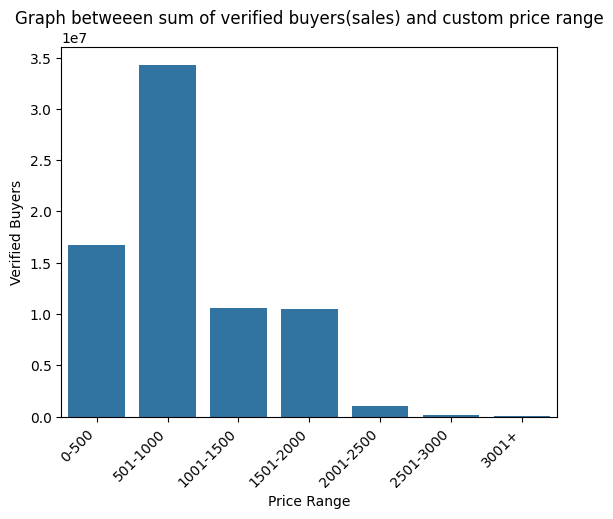

In [143]:
sns.barplot(x=sum_verified_by_price_range['Price Range'],y=sum_verified_by_price_range['Verified Buyers'],data= sum_verified_by_price_range)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph betweeen sum of verified buyers(sales) and custom price range')
plt.show()



CONCLUSION - The price range 501-1000 is the sweet spot for the women category of myntra sales.This shows that customers are keen on purchasing medium range products.

In [144]:
result.Discount.dtype

dtype('O')

In [145]:
result['Discount'].values

array(['57% OFF', '10% OFF', '60% OFF', ..., '78.0% OFF', '78.0% OFF',
       '78.0% OFF'], dtype=object)

### INFLUENCE OF  DISCOUNT  ON THE NUMBER OF VERIFIED BUYERS(SALES)
#### CREATING CUSTOM  DISCOUNT RANGE IN THE BELOW CELL.

In [146]:
def extract_numeric(discount):
    if 'Rs.' in discount:
        return int(float(discount.replace('Rs. ', '').replace(' OFF', '')))
    elif '%' in discount:
        return int(float(discount.replace('% OFF', '')))
    return 0

# Extract numeric values from discount column

result['Discount Value'] = result['Discount'].apply(extract_numeric)

# Calculate percentage discount for absolute result
result.loc[result['Discount'].str.contains('Rs.'), 'Discount Percent'] = (
    result['Discount Value'] / result['Product Price'] * 100
)

# Use the original percentage discounts where applicable
result.loc[result['Discount'].str.contains('%'), 'Discount Percent'] = result['Discount Value']

# Round the discount percentages to 2 decimal places for consistency
result['Discount Percent'] = result['Discount Percent'].round(2)

# Define discount bins and labels
discount_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
discount_labels = ['0-10%', '11-20%', '21-30%', '31-40%', '41-50%', '51-60%', '61-70%', '71-80%', '81-90%', '91-100%', '100%+']

# Assign discount range categories
result['Discount Range'] = pd.cut(result['Discount Percent'], bins=discount_bins, labels=discount_labels)




In [147]:
result.head(5)

,Product Name,Product Price,Product Brand,Discount,Product Rating,Verified Buyers,Price Range,Discount Value,Discount Percent,Discount Range
0,Women Wide Leg High-Rise Jeans,1031.0,SASSAFRAS,57% OFF,4.1,6800.0,1001-1500,57,57.0,51-60%
1,Women Cargo Style Jeans,629.0,V-Mart,10% OFF,2.6,5.0,501-1000,10,10.0,0-10%
4,Women Wide Leg Catherin Jeans,1436.0,MANGO,60% OFF,4.2,284.0,1001-1500,60,60.0,51-60%
5,Women High-Rise Jeans,1099.0,SASSAFRAS BASICS,50% OFF,4.0,1300.0,1001-1500,50,50.0,41-50%
8,Women Straight High-Rise Jeans,2391.0,Levis,8% OFF,4.4,33.0,2001-2500,8,8.0,0-10%


In [148]:
sum_verified_by_price_range['Discount Range'] =  result['Discount Range'].copy()

In [149]:
sum_verified_by_price_range

,Price Range,Verified Buyers,Discount Range
0,0-500,16726890.0,51-60%
1,501-1000,34319959.0,0-10%
2,1001-1500,10623954.0,51-60%
3,1501-2000,10540809.0,NaN
4,2001-2500,1072805.0,51-60%
5,2501-3000,138911.0,41-50%
6,3001+,36628.0,NaN


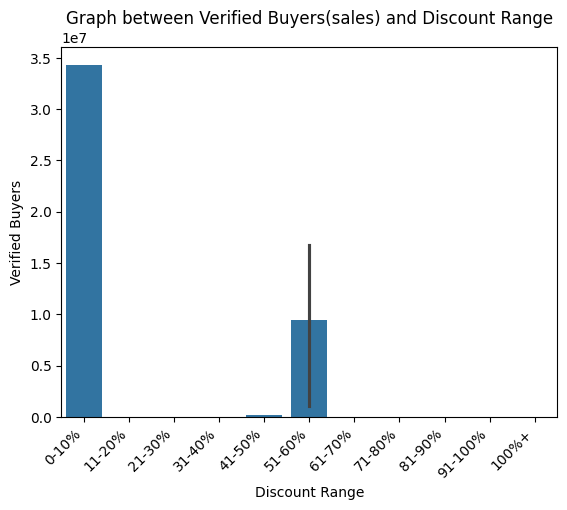

In [150]:
sns.barplot(x=sum_verified_by_price_range['Discount Range'],y=sum_verified_by_price_range['Verified Buyers'],data= sum_verified_by_price_range)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers(sales) and Discount Range')
plt.show()

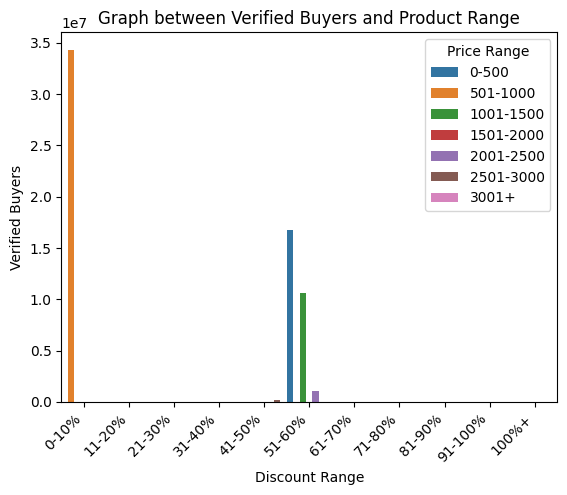

In [151]:
sns.barplot(x='Discount Range',y='Verified Buyers',data= sum_verified_by_price_range,hue=sum_verified_by_price_range['Price Range'],width=1)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers and Product Range')
plt.show()

CONCLUSION - Maximum sales occur in the 501-1000 price range. In this price range discount is minimum(only 0-10%) , so we  obtain maximum buyers in 0-10% discount range. Similarly buyers also prefer products within 0-500 and 1001-1500 range where discount range is 51-60%. So we can conclude that Price range plays moreimportant role in customer purchase than discount.

### VERIFIED BUYERS(SALES) VS PRODUCT RATING

In [152]:
result[['Product Rating','Discount Range','Price Range']]

,Product Rating,Discount Range,Price Range
0,4.1,51-60%,1001-1500
1,2.6,0-10%,501-1000
4,4.2,51-60%,1001-1500
5,4.0,41-50%,1001-1500
8,4.4,0-10%,2001-2500
...,...,...,...
210109,4.3,71-80%,1001-1500
210147,4.3,71-80%,1001-1500
210159,4.3,71-80%,1001-1500
210197,4.3,71-80%,1001-1500


In [158]:
result.iloc[4]

Product Name        Women Straight High-Rise Jeans
Product Price                               2391.0
Product Brand                                Levis
Discount                                    8% OFF
Product Rating                                 4.4
Verified Buyers                               33.0
Price Range                              2001-2500
Discount Value                                   8
Discount Percent                               8.0
Discount Range                               0-10%
Name: 8, dtype: object

In [159]:
result[result['Product Rating'] == 5.0]['Verified Buyers'].sum() 

5921.0

In [160]:
# We create a new dataframe where we group the buyers with respect to rating , in order to find out if previous rating influences buyers.
sum_verified_by_product_rating = result.groupby('Product Rating')['Verified Buyers'].sum().reset_index()

print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_product_rating)

Sum of Verified Buyers by Price Range:
    Product Rating  Verified Buyers
0              1.0            131.0
1              1.2             43.0
2              1.3             83.0
3              1.4             34.0
4              1.5            122.0
5              1.6             79.0
6              1.7            141.0
7              1.8            399.0
8              1.9            211.0
9              2.0           1686.0
10             2.1            277.0
11             2.2           1218.0
12             2.3           1496.0
13             2.4           1880.0
14             2.5           2357.0
15             2.6           2640.0
16             2.7           3275.0
17             2.8          11369.0
18             2.9          40006.0
19             3.0          39271.0
20             3.1          45689.0
21             3.2          46888.0
22             3.3          68898.0
23             3.4         162469.0
24             3.5         409754.0
25             3.6       

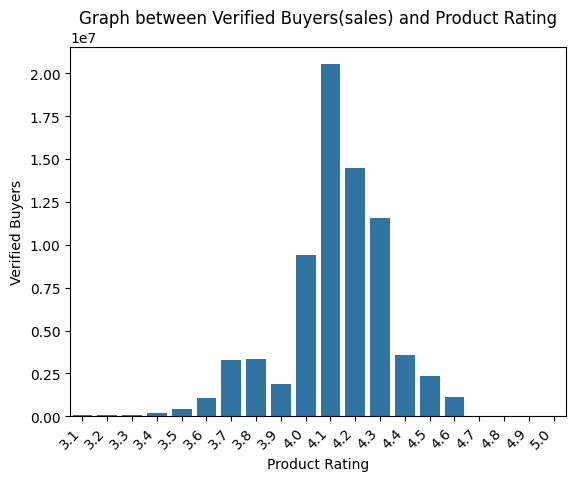

In [161]:
sns.barplot(x=sum_verified_by_product_rating['Product Rating'].iloc[20:],y=sum_verified_by_product_rating['Verified Buyers'].iloc[20:],data= sum_verified_by_product_rating)
plt.xticks(rotation=45, ha = 'right')
plt.title('Graph between Verified Buyers(sales) and Product Rating')   
plt.show() 

CONCLUSION - NUMBER OF VERFIED BUYERS(SALES)  IS NOT DIRECTLY PROPORTIONAL TO RATING.  VALUE OF RATING 4.0 TO 4.5 CONSTITUTE THE MAXIMUM NUMBER OF VERIFIED BUYERS.

In [162]:
result.columns

Index(['Product Name', 'Product Price', 'Product Brand', 'Discount',
       'Product Rating', 'Verified Buyers', 'Price Range', 'Discount Value',
       'Discount Percent', 'Discount Range'],
      dtype='object')

### FINDING THE TOP 10 POPULAR BRANDS IN THE WOMEN SECTION

In [163]:
sum_verified_by_brands = result.groupby('Product Brand')['Verified Buyers'].sum().reset_index()
print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_brands)

Sum of Verified Buyers by Price Range:
           Product Brand  Verified Buyers
0                   109F             55.0
1              20Dresses           1976.0
2                   3PIN              6.0
3     4WRD by Dressberry           3948.0
4                    513           2647.0
...                  ...              ...
1396          trueBrowns              5.0
1397             urSense            971.0
1398              wild U            223.0
1399                zebu           4962.0
1400              zink Z            304.0

[1401 rows x 2 columns]


In [164]:
top_10_brands = sum_verified_by_brands.nlargest(10, 'Verified Buyers')
top_10_brands

,Product Brand,Verified Buyers
586,KALINI,23111191.0
1212,Uptownie Lite,11036772.0
402,FableStreet,4548079.0
197,CHIC BY TOKYO TALKIES,4211333.0
1185,Tokyo Talkies,4052815.0
570,Jaipur Kurti,3213893.0
994,Roadster,3170349.0
1344,anayna,2548571.0
1016,SASSAFRAS,1128346.0
172,Blissclub,1087886.0


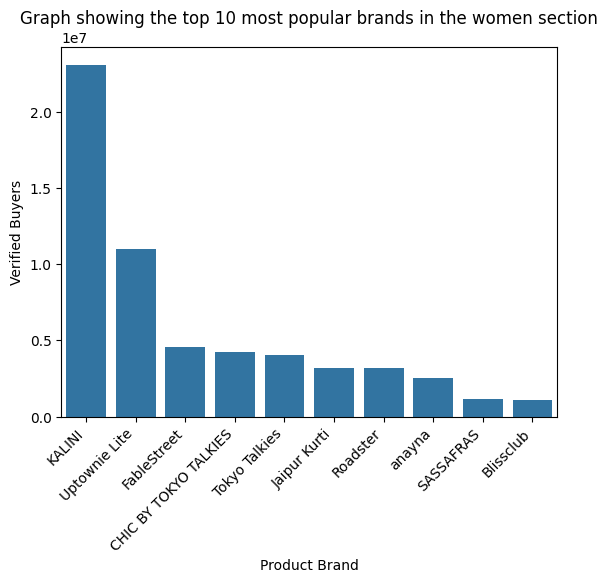

In [165]:
sns.barplot(x=top_10_brands['Product Brand'],y=top_10_brands['Verified Buyers'])
plt.xticks(rotation=45,ha='right')
plt.title('Graph showing the top 10 most popular brands in the women section')
plt.show()

### FINDING THE MOST POPULAR PRODUCTS IN THE WOMEN SECTION

In [166]:
sum_verified_by_product_type = result.groupby('Product Name')['Verified Buyers'].sum().reset_index()

print("Sum of Verified Buyers by Price Range:")
print(sum_verified_by_product_type)

Sum of Verified Buyers by Price Range:
                      Product Name  Verified Buyers
0         -Neck Straight Kurta Set              6.0
1       100% Cotton Running Shorts              5.0
2       2 Rapid-Dry Cycling Shorts             25.0
3        2 pack Printed Jersey Top              5.0
4         2-Pack Lace-Trimmed Tops             32.0
...                            ...              ...
17144       women Pink knitted Top             45.0
17145  women Print Styled Back Top              7.0
17146            women Ruffles Top           1300.0
17147    women Solid Tank Crop Top             13.0
17148                   womens Top             11.0

[17149 rows x 2 columns]


In [167]:
top_10_products = sum_verified_by_product_type.nlargest(10, 'Verified Buyers')
top_10_products

,Product Name,Verified Buyers
5050,Kurta with Trousers & Dupatta,5223358.0
5035,Kurta with Patiala & Dupatta,3681651.0
11691,White Cowl Neck Crop Top,3503300.0
727,Black Cowl Neck Crop Top,3498000.0
16568,Women Trousers,3027745.0
1492,Cotton Embroidered Kurta Set,2506010.0
5015,Kurta With Trousers & Dupatta,2182880.0
5792,One Shoulder Crop Top,2173149.0
2484,Empire Cotton Kurta Set,2076415.0
2439,Embroidered Straight Kurta Set,1873240.0


After we find the most popular products  using these exploratory analytics techniques,  we can use the ML algorithm  to  find out similar trendy items of these products. The comapny can analyse the product diversity of the similar items and enrich, enhance customer experience by adding more such on-demand clothing. The ML algorithm is shown in trend-myntra-sale.py file.